In [1]:
import sympy as sp
import numpy as np
from sympy import lambdify
import matplotlib.pyplot as plt
from scipy.linalg import eig, inv
from scipy.integrate import odeint
from IPython.display import display, Math


#### Analytical Solution for $\frac{d\vec{X}}{dt} = A\vec{X} + \vec{B}$

Let's derive the analytical solution step-by-step for the differential equation $\frac{d\vec{X}}{dt} = A\vec{X} + \vec{B}$, assuming $\lambda_1 \neq \lambda_2$.

##### Steps to Solve Analytically

1. Find the Equilibrium State
The equilibrium state $\vec{X}_{eq}$ is given by:
$$
\vec{X}_{eq} = -A^{-1} \vec{B}
$$

2. Determine the Eigenvalues and Eigenvectors
The eigenvalues $\lambda_1$ and $\lambda_2$ are solutions to the characteristic equation:
$$
\det(A - \lambda I) = 0
$$
where $I$ is the identity matrix.

Let's denote the eigenvectors corresponding to $\lambda_1$ and $\lambda_2$ as $\vec{v}_1$ and $\vec{v}_2$, respectively.

3. General Solution
The general solution for the system $\frac{d\vec{X}}{dt} = A\vec{X}$ can be written as:
$$
\vec{X}(t) = c_1 \vec{v}_1 e^{\lambda_1 t} + c_2 \vec{v}_2 e^{\lambda_2 t}
$$
where $c_1$ and $c_2$ are constants determined by initial conditions.

4. Incorporate the Equilibrium State
To incorporate $\vec{B}$, we use the transformation $\vec{X} = \vec{X}_{hom} + \vec{X}_{eq}$, where $\vec{X}_{hom}$ is the homogeneous solution. Thus:
$$
\vec{X}(t) = \vec{X}_{hom}(t) + \vec{X}_{eq}
$$
$$
\vec{X}(t) = c_1 \vec{v}_1 e^{\lambda_1 t} + c_2 \vec{v}_2 e^{\lambda_2 t} + \vec{X}_{eq}
$$

This gives us the analytical solution in the form:
$$
\vec{X}(t) = \begin{pmatrix} 
a_1 e^{\lambda_1 t} + a_2 e^{\lambda_2 t} \\ 
b_1 e^{\lambda_1 t} + b_2 e^{\lambda_2 t} 
\end{pmatrix} + \vec{X}_{eq}
$$



5. General Solution for Repeated Eigenvalues

The general solution when $\lambda_1 = \lambda_2 = \lambda$ is:
$$
\vec{X}(t) = (c_1 + c_2 t) e^{\lambda t} \vec{v} + \vec{X}_{eq}
$$

In [2]:
def solve_linear_system_numerical(A, B, X0, t):
    """
    Solves the differential equation dX/dt = AX + B.

    Parameters:
    A (numpy.ndarray): Coefficient matrix.
    B (numpy.ndarray): Constant vector.
    X0 (numpy.ndarray): Initial condition vector.
    t (numpy.ndarray): Array of time points at which to solve.

    Returns:
    numpy.ndarray: Array of solution vectors at each time point.
    """
    # Equilibrium state
    X_eq = -inv(A) @ B

    # Eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eig(A)

    # Solve for the constants a1, a2, b1, b2
    def system(X, t):
        return A @ X + B

    sol = odeint(system, X0, t)

    return {"x": sol, "xeq": X_eq, "ev": eigenvalues, "evec": eigenvectors}


#### Numerical solution

In [3]:
B_np = np.array([7, 1])
X0_np = np.array([0, 0])
A_np = np.array([[-9, -5], [1, -3]])
t_range = np.linspace(0, 3, 100)
solution_num = solve_linear_system_numerical(
    A_np, B_np, X0_np, t_range
)
solution_num["x"].shape

(100, 2)

#### Analytical solution

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equilibrium state: [0.5 0.5]
Eigenvalues: [-8.+0.j -4.+0.j]


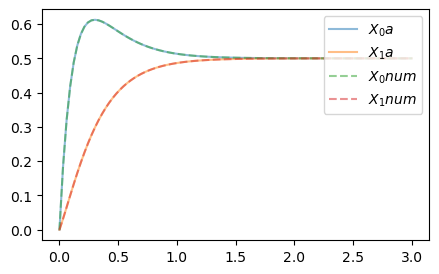

In [4]:

t = sp.Symbol('t')
x1, x2 = sp.Function('x1')(t), sp.Function('x2')(t)
A = sp.Matrix(A_np)
X = sp.Matrix([x1, x2])
B = sp.Matrix(B_np)
X0 = sp.Matrix(X0_np)

dx_dt = A * X + B
system = [sp.Eq(sp.diff(x1, t), dx_dt[0]), sp.Eq(sp.diff(x2, t), dx_dt[1])]
sol_hom = sp.dsolve(system)

t0 = 0
constants = sp.solve(
    [sol.rhs.subs(t, t0) - x0 for sol, x0 in zip(sol_hom, X0)]
)

sol_hom_constants = [sol.rhs.subs(constants) for sol in sol_hom]
final_solution = [sol_hom for sol_hom in sol_hom_constants]

# display solutions
for i, sol in enumerate(final_solution, 1):
    display(Math(f'x_{i}(t) = {sp.latex(sol)}'))
    
# evaluate solution
x_functions = [lambdify((t,), sol, "numpy") for sol in final_solution]
x_values = [x_func(t_range) for x_func in x_functions]

# plot solutions
plt.figure(figsize=(5,3))
for i in range(2):
    plt.plot(t_range, x_values[i], label=f'$X_{i} a$', alpha=0.5)
    
# plot numerical solution to compare
for i in range(2):
    plt.plot(t_range, solution_num['x'][:, i], label=f'$X_{i} num$', ls='--', alpha=0.5)
    
plt.legend(loc='upper right');
print("Equilibrium state:", solution_num['xeq'])
print("Eigenvalues:", solution_num['ev'])

We can define the above process as a function `solve_system_of_equations` that takes in the coefficient matrix `A`, rhs of `B` and initial conditions `X0` and time range `t_range`. The function will return the final analytical solution and evalution of the function at fiven time interval.


In [9]:
from spikes.solver import solve_system_of_equations

A_np = np.array([[1, 2], [3, 4]])
B_np = np.array([5, 6])
X0_np = np.array([7, 8])
t_range = np.linspace(0, 1, 100)

final_solution, x_values = solve_system_of_equations(A_np, B_np, X0_np, t_range)

for i, sol in enumerate(final_solution, 1):
    display(Math(f'x_{i}(t) = {sp.latex(sol)}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equilibrium state: [ 4.  -4.5]
Eigenvalues: [-0.37228132+0.j  5.37228132+0.j]


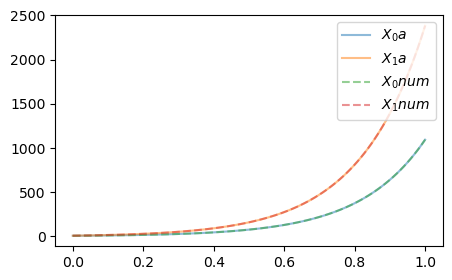

In [10]:
solution_num = solve_linear_system_numerical(
    A_np, B_np, X0_np, t_range
)
# solution_num["x"].shape

plt.figure(figsize=(5,3))
for i in range(2):
    plt.plot(t_range, x_values[i], label=f'$X_{i} a$', alpha=0.5)
    
# plot numerical solution to compare
for i in range(2):
    plt.plot(t_range, solution_num['x'][:, i], label=f'$X_{i} num$', ls='--', alpha=0.5)
    
plt.legend(loc='upper right');
print("Equilibrium state:", solution_num['xeq'])
print("Eigenvalues:", solution_num['ev'])